In [1]:
#
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import sys

In [2]:
#
import matplotlib.pylab as plt
from numpy.random import randn
%matplotlib inline

# Chapter 3 IPython: An Interactive Computing and Development Environment

Search all numpy function containing "load"

In [2]:
np.*load*?

Run the scrip ipython_script_test.py inside iPython

In [3]:
%run ipython_script_test.py

The sum is 1.47


Assign the output of next line to variable b

In [4]:
##
2*3

6

In [5]:
b = _

Delete variable b

In [6]:
%xdel b

Delete all variables

In [7]:
%reset -f

Run the following two methods once and record the time

In [8]:
##
strings = ['foo', 'foobar', 'baz', 'qux',
          'python', 'Guido Van Rossum'] * 10000
method1 = [x for x in strings if x.startswith('foo')]
method2 = [x for x in strings if x[:3] == 'foo']

In [9]:
%time method1 = [x for x in strings if x.startswith('foo')]

CPU times: user 18 ms, sys: 1.24 ms, total: 19.3 ms
Wall time: 19.2 ms


In [10]:
%time method2 = [x for x in strings if x[:3] == 'foo']

CPU times: user 12.2 ms, sys: 674 µs, total: 12.9 ms
Wall time: 13.3 ms


Run the two methods above multiple times and record the average execution time

In [11]:
%timeit method1 = [x for x in strings if x.startswith('foo')]

11.9 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit method2 = [x for x in strings if x[:3] == 'foo']

8.32 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Record the execution time of cprof_example.py

In [13]:
%time %run cprof_example.py

Largest one we saw: 11.7744394975
CPU times: user 1 s, sys: 45.6 ms, total: 1.05 s
Wall time: 887 ms


Profile the time cost of cprof_example.py

In [14]:
%run -p -s cumtime cprof_example.py

Largest one we saw: 11.8111913012
 

Profile the time cost of a single statement run_experiment()

In [15]:
%prun -s cumtime run_experiment()

Import prof_mod and then reload it

In [16]:
import prof_mod
from importlib import reload
reload(prof_mod)

<module 'prof_mod' from '/Users/junjiezhao/Downloads/Python for Data Analysis/prof_mod.py'>

Modify the following class to a IPython friendly class, then poof it.

In [17]:
#
class Message:
    def __init__(self, msg):
        self.msg = msg

In [18]:
class Message:
    def __init__(self, msg):
        self.msg = msg
        
    def __repr__(self):
        return 'Message: %s' % self.msg

In [19]:
x = Message('Secret')

In [20]:
x

Message: Secret

Import prof_mod, the record the time of each line in the function of add_and_sum and call_function

In [21]:
%run prof_mod
%load_ext line_profiler
%lprun -f add_and_sum -f call_function call_function()

ModuleNotFoundError: No module named 'line_profiler'

# Chapter 4: NumPy Basics: Arrays and Vectorized Computation

Display the date type of the following array, and cast it to float64 type

In [ ]:
#
arr = np.array([1, 2, 3, 4, 5])

In [ ]:
arr.dtype

In [ ]:
float_arr = arr.astype(np.float64)

Create a copy of arr[1:3]

In [ ]:
copy = arr[1:3].copy()
copy

Fancy indexing: return the row 4, row 3, row 0 and row 6 of arr

In [ ]:
#
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
    
arr

In [ ]:
arr[[4, 3, 0, 6]]

Fancy indexing: select elements (1,0), (5,3), (7, 1) and (2, 2) from arr and return a 1-d array

In [ ]:
# 
arr = np.arange(32).reshape((8, -1))
arr

In [ ]:
arr[[1,5,7,2],[0,3,1,2]]

Fancy indexing: select elements (1,0), (5,3), (7, 1) and (2, 2) from arr and return a 2-d array to maintain their relative location

In [ ]:
arr[[1,5,7,2]][:, [0,3,1,2]]

Fancy indexing: finish the previous question by using np.ix_

In [ ]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

Elementwisely return the fractional and integral parts of a floating point array arr

In [ ]:
#
arr = np.random.randn(7) * 5
arr

In [ ]:
np.modf(arr)

Use a numpy function to generate an array by taking a value from xarr whenever the correspoing value in cond is True otherwise take the value from yarr

In [ ]:
#
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
np.where(cond, xarr, yarr)

For a matrix arr of random numbers, use the same numpy function to replace all positive values with 2 and all negative values with -2

In [ ]:
#
arr = np.random.randn(4, 4)
arr

In [ ]:
np.where(arr>0, 2, -2)

Now use the same function, set only the positive values to 2 and keep other values of arr

In [ ]:
np.where(arr>0, 2, arr)

Return the unique values in names and ints

In [ ]:
#
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [ ]:
np.unique(names)

In [ ]:
np.unique(ints)

Check the membership of values in another array [2, 3, 6] and return the result as a boolean array

In [ ]:
#
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [ ]:
np.in1d(values, [2, 3, 6])

Save arr to a .npy file, and then load it back and assign to arr2

In [ ]:
np.save('some_array', arr)
arr2 = np.load('some_array.npy')
arr2

Save arr and arr2 to a single npz file, then load them back and assign arr2 to arr3

In [ ]:
np.savez('array_archive.npz', arr = arr, arr2 = arr2)

In [ ]:
arch = np.load('array_archive.npz')
arr3 = arch['arr2']
arr3

Create an ndarray arr by load a txt file from download/examples/array_ex.txt

In [ ]:
arr = np.loadtxt('download/examples/array_ex.txt', delimiter = ',')
arr

Now save arr to a txt file 'some_text.txt'

In [ ]:
np.savetxt('some_text.txt', arr)

# Chapter 5: Getting Started with pandas

In [ ]:
#
import pandas as pd
from pandas import Series, DataFrame

Create a series named "obj" by a list of [4, 7, -5, 3]

In [ ]:
obj = Series([4, 7, -5, 3])

Return the array representation of obj

In [ ]:
obj.values

Return the index of obj

In [ ]:
obj.index

Creat a series objs by a list of [4, 7, -5, 3] and index ['d', 'b', 'a', 'c']

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

Return the value with index 'c' and 'a'

In [ ]:
obj2[['c', 'a']]

Return the values > 0

In [ ]:
obj2[obj2 > 0]

Create a series obj3 sdata from a dict {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Run the following line to verify you thought

In [ ]:
#
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index = states)
obj4

Use a pd function to check the NaN in obj4

In [ ]:
pd.isnull(obj4)

Run the following line to verify your thought

In [ ]:
obj3 + obj4

Name obj 4 as "population" and name its index as "State"

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

Assign new index ['Bob', 'Steve', 'Jeff', 'Ryan'] to obj

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Create a DataFrame frame by dict data

In [ ]:
#
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [ ]:
frame = DataFrame(data)
frame

Run the following line to verify your thought

In [ ]:
frame2 = DataFrame(data, columns = ['year', 'state', 'pop', 'debt'],
                  index = ['one', 'two', 'three', 'four', 'five'])
frame2

Return the column names of frame2

In [ ]:
frame2.columns

Assign a Series to debt and verify your thought

In [ ]:
#
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [ ]:
frame2.debt = val
frame2

Check whether the state in each row is "Ohio", and append the result to frame2 as a new column 'eastern'

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

Delete the column of 'eastern'

In [ ]:
frame2.drop('eastern', inplace=True, axis=1)
frame2

Run the following code

In [ ]:
#
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, \
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)
frame3

Give frame3 a column name of 'state' and an index name of 'year'

In [ ]:
frame3.columns.name = 'state'
frame3.index.name = 'year'
frame3

For the obj below, reindex it by ['a', 'b', 'c', 'd', 'e'], and fill missing values by 0, and ruturn the result as obj2

In [ ]:
#
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value = 0)
obj2

For the obj3 below, reindx it by range(6) and forward-fill the missing values

In [ ]:
#
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [ ]:
obj3.reindex(range(6), method = 'ffill')

For the frame below, reindex its rows by ['a', 'b', 'c', 'd'] and return as frame2

In [ ]:
# 
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

In [ ]:
frame2 = frame.reindex(index = ['a', 'b', 'c', 'd'])
frame2

Now re-column frame by ['Texas', 'Utah', 'California']

In [ ]:
frame.reindex(columns=['Texas', 'Utah', 'California'])

reindex and re-column frame (combine the two steps above), and forward fill the missing values

In [ ]:
frame.reindex(index = ['a', 'b', 'c', 'd'],
              columns=['Texas', 'Utah', 'California']).fillna(method = 'ffill')

In [ ]:
frame

Run next line. Then return the columns of 'three' and 'one' from data

In [ ]:
#
data = DataFrame(np.arange(16).reshape((4, 4)),
                index=['Ohio', 'Colorado', 'Utah', 'New York'],
                columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data[['three', 'one']]

Return all rows where 'three' is larger than 5

In [ ]:
data[data['three']>5]

Label-based indexing: return the rows of 'Colorado' and 'New York' and keep only the columns of 'one' and 'three'

In [ ]:
data.loc[['Colorado', 'New York'], ['one', 'three']]

Position-based indexing, return the first two rows of data

In [ ]:
data.iloc[0:3]

Add df1 and df2; fill missing values as 0

In [ ]:
#
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df1

In [ ]:
#
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2

In [ ]:
df1.add(df2, fill_value=0)

Compute frame - series, where index/column should match

In [ ]:
#
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
#
series = frame.iloc[0]
series

In [ ]:
frame.sub(series, axis = 1)

Apply function f each row of frame, and then apply to each column of frame

In [ ]:
#
f = lambda x: x.max() - x.min()
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
frame.apply(f, axis = 1)

In [ ]:
frame.apply(f)

Code a function and apply it to frame to return a DataFrame of the min and max value of each state

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index = ['min', 'max'])
frame.apply(f, axis = 1)

Code a function and apply it to frame so that each element in frame keeps only two decimals

In [ ]:
def f(x):
    return '%.2f' % x
frame.applymap(f)

Sort Series obj by index

In [ ]:
#
obj = Series(range(4), index=['d', 'a', 'b', 'c'])

In [ ]:
obj.sort_index()

Sort frame by index, the sort again by column

In [ ]:
#
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame

In [ ]:
frame.sort_index(axis = 0)

In [ ]:
frame.sort_index(axis = 1)

Sort frame by column in descending order

In [ ]:
frame.sort_index(axis=1, ascending=False)

Sort a Series obj by its values

In [ ]:
#
obj = Series([4, 7, -3, 2])

In [ ]:
obj.sort_values()

Sort frame by the value of 'b'

In [ ]:
#
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_values(by='b')

Rank obj. For two same elements, the one shows ealier should have lower rand

In [ ]:
#
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [ ]:
obj.rank(method='first')

Rank frame along row and column, respectively

In [ ]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

In [ ]:
frame.rank(axis=1)

In [ ]:
frame.rank(axis=0)

Calculate the mean of each row in df. Do not skip NaN. So if one line has a NaN element, the mean would be NaN

In [ ]:
#
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

In [ ]:
df.mean(axis = 1, skipna=False)

Return the index of max and min value in each column of df

In [ ]:
df.idxmax(axis=0)

In [ ]:
df.idxmin(axis=0)

In [ ]:
df.idxmax(axis=0)

Compute the cumulative sum of df along each column

In [ ]:
df.cumsum(axis=0)

Run the next two cells to create a DataFrame returns

In [ ]:
#
from pandas_datareader import data
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = data.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')

In [ ]:
#
price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.items()})
returns = price.pct_change()

For returns, Calculate the correlation and covariance of MSFT and IBM

In [ ]:
returns.MSFT.corr(returns.IBM)

In [ ]:
returns.MSFT.cov(returns.IBM)

Compute the correlation matrix of returns

In [ ]:
returns.corr()

Compute the correlation of IBM with all stocks

In [ ]:
returns.corrwith(returns.IBM)

Compute the correlation between returns and volume for each stock

In [ ]:
returns.corrwith(volume)

Return the unique values of obj

In [ ]:
#
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

In [ ]:
obj.unique()

Count the occurence of each value in obj

In [ ]:
obj.value_counts()

Return the rows of 'b' or 'c' from obj

In [ ]:
mask = obj.isin(['b', 'c'])
obj[mask]

Remove NaN from data

In [ ]:
#
data = Series([1, NA, 3.5, NA, 7])
data

In [ ]:
data.dropna()

Drop the rows in data if any NaN is in that row

In [ ]:
#
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
data

In [ ]:
data.dropna(how='any')

In [ ]:
data.dropna(how='all')

Now do the questions again but only drop by columns

In [ ]:
data.dropna(axis=1)

In [ ]:
data.dropna(axis=1, how='all')

For DataFrame df, drop a line if has less than 2 non-NaN values

In [ ]:
#
df = DataFrame(np.random.randn(7, 3))
df.loc[:4, 1] = NA; df.loc[:2, 2] = NA
df

In [ ]:
df.dropna(thresh=2)

Fill missing values in df as 0

In [ ]:
df.fillna(0)

Fill missing value in column '1' as 0.5, and column 2 as 0.6

In [ ]:
df.fillna({1:0.5, 2:0.6})

Repeat last step but modify df directly instead of returning a new object

In [ ]:
df.fillna({1:0.5, 2:0.6}, inplace=True)
df

Run the next cell

In [ ]:
#
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

Give index names of ['key1', 'key2'], and give columns names of ['state', 'color']

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

Return data of frame that state is Ohio and key1 is a

In [ ]:
frame['Ohio'].loc['a']

Swap key1 and key2 in frame

In [ ]:
frame.swaplevel(0, 1)

Swap state and color in frame

In [ ]:
frame.swaplevel(0, 1, axis=1)

Run the next cell

In [ ]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

Move c and d to labels, and return the result as frame2

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

Now do the opposite operation: move c and d back to columns

In [ ]:
frame2.reset_index().sort_index(axis=1)

Return the 2nd element of ser3

In [ ]:
#
ser3 = Series(range(3), index=[-5, 1, 3])
ser3

In [ ]:
ser3.iloc[1]

Return 2nd row, 1st column of frame, respectively

In [ ]:
# 
frame = DataFrame(np.arange(6).reshape(3, 2), index=[2, 0, 1])
frame

In [ ]:
frame.iloc[1, :]

In [ ]:
frame.iloc[:, 0]

# Chapter 6: Data Loading, Storage, and File Formats

Display the content of download/example/ex1.csv

In [112]:
!cat download/examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Use read_csv to reate a DataFrame df from this csv file

In [47]:
df = pd.read_csv('download/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Create df again, but use read_table instead

In [48]:
df = pd.read_table('download/examples/ex1.csv', sep = ',')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Create a DateFrame from 'download/examples/ex2.csv', which has no headers

In [49]:
pd.read_csv('download/examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Create the DataFrame above again, but now assign column names

In [50]:
pd.read_csv('download/examples/ex2.csv', header=None,
            names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Create DataFrame from ex2.csv again, and use 'message' as the index 

In [51]:
pd.read_csv('download/examples/ex2.csv', header=None, 
           names=['a', 'b', 'c', 'd', 'message'],
           index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Display the content of 'download/examples/csv_mindex.csv'

In [52]:
!cat 'download/examples/csv_mindex.csv'

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


Create DataFrame parsed from csv_mindex.csv, and use key1 and key2 as multilevel index

In [55]:
parsed = pd.read_csv('download/examples/csv_mindex.csv', 
                    index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

Display download/examples/ex3.tx to observe its deimiter

In [57]:
!cat download/examples/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


Create a DataFrame 'result' from ex3.txt

In [68]:
result = pd.read_table('download/examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Display ex4.csv observe which rows should be skpped.

In [69]:
!cat download/examples/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Create dataframe from ex4.csv. Skip the commenting rows.

In [70]:
pd.read_csv('download/examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Display ex5.csv, and observe the missing data

In [72]:
!cat download/examples/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [73]:
result = pd.read_csv('download/examples/ex5.csv')
result.isnull()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


Create a data frame from ex5.csv, and define 'NULL' as missing values

In [76]:
pd.read_csv('download/examples/ex5.csv', na_values=['NULL'])

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Create a data frame from ex5.csv. For the column of 'message', define 'foo' and 'NA' as missing values; for the column of 'something', define 'two' as missing value

In [77]:
pd.read_csv('download/examples/ex5.csv',
            na_values={'message':['foo', 'NA'], 'something':'two'})

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


Create a data frame from the first 5 rows of ex6.csv

In [80]:
pd.read_csv('download/examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


Create a TextParser from ex6.csv by chunksize of 1000; then count the number of each unique value in the column of 'key'

In [102]:
chunker = pd.read_csv('download/examples/ex6.csv', chunksize=1e3)

In [103]:
tot = Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

In [106]:
tot = tot.sort_values(ascending=False)
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64

Create a data frame 'data' from ex5.csv, and write it to out.csv, then display it

In [116]:
data = pd.read_csv('download/examples/ex5.csv')

In [117]:
data.to_csv('out.csv')

In [118]:
!cat out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


Write data to printed screen display, and set '|' as the delimeter

In [124]:
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


Write data to printed screen display, and disply missing values as 'NULL'

In [125]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


Repeat last question, but skip the index and column

In [126]:
data.to_csv(sys.stdout, na_rep='NULL', index=False, header=False)

one,1,2,3.0,4,NULL
two,5,6,NULL,8,world
three,9,10,11.0,12,foo


Write data to the screen display; skip the index; only write the columns of 'a', 'b', and 'c'

In [131]:
data.to_csv(sys.stdout, na_rep='NULL', index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,NULL
9,10,11.0


Display ex7.csv and observe it format

In [135]:
!cat download/examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


Convert ex7.csv to {'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [137]:
import csv

In [138]:
with open('download/examples/ex7.csv') as f:
    reader = csv.reader(f)
    lines = list(reader)
    headers = lines[0]
    values = lines[1:]
    data_dic = {h: v for h, v in zip(headers, zip(*values))}

In [139]:
data_dic

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

Load download/examples/example.json, and return the result

In [167]:
import json

In [168]:
with open('download/examples/example.json') as f:
    result = json.load(f)

In [169]:
result

[{'a': 1, 'b': 2, 'c': 3}, {'a': 4, 'b': 5, 'c': 6}, {'a': 7, 'b': 8, 'c': 9}]

Now save result to a new json file download/examples/newJson.json

In [170]:
with open('download/examples/newJson.json', 'w') as f:
    json.dump(result, f)

# Chapter 7: Data Wrangling: Clean, Transform, Merge, Reshape

Merge (join) df1 and df on their shared column name. Try inner, left right, and outer merge and verify your expectation

In [2]:
#
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df1

df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [3]:
pd.merge(df1, df2, on='key', how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [4]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [5]:
pd.merge(df1, df2, on='key', how='right')

,data1,key,data2
0,0.0,b,1
1,1.0,b,1
2,5.0,b,1
3,0.0,b,3
4,1.0,b,3
5,5.0,b,3
6,2.0,a,0
7,4.0,a,0
8,2.0,a,2
9,4.0,a,2


In [6]:
pd.merge(df1, df2, on='key', how='outer')

,data1,key,data2
0,0.0,b,1.0
1,0.0,b,3.0
2,1.0,b,1.0
3,1.0,b,3.0
4,5.0,b,1.0
5,5.0,b,3.0
6,2.0,a,0.0
7,2.0,a,2.0
8,4.0,a,0.0
9,4.0,a,2.0


Merge df3 and df4 on 'lkey' and 'rkey'

In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})

In [8]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


Merge left and right by two keys of key1 and key2, and verify your thoughts. Try both inner and outer

In [9]:
#
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

In [10]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [11]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [12]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [13]:
pd.merge(left, right, how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


Merge left and right on key1 only

In [14]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


Observe left1 and right1, then merge them

In [15]:
#
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                   'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [16]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [17]:
right1

,group_val
a,3.5
b,7.0


In [18]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


Observe left2 and right2, and merge them

In [19]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [20]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [21]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [22]:
pd.merge(left2, right2, left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


Concatenate s1, s2, and s3 by default settings

In [23]:
#
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([4, 5], index=['f', 'g'])

In [24]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    4
g    5
dtype: int64

Now cnocatenate them by axis 1

In [25]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,4.0
g,NaN,NaN,5.0


Now repeat last question but requst inner join on axis 0. Verify your thought

In [26]:
pd.concat([s1, s2, s3], axis=1, join='inner')

,0,1,2


Now concatenate s4 and s1 in axis 0 and 1 separately, and verify your thought

In [27]:
#
s4 = pd.concat([s1*5, s3])
s4

a    0
b    5
f    4
g    5
dtype: int64

In [28]:
s1

a    0
b    1
dtype: int64

In [29]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,4
g,NaN,5


Concatenate s1, s2, and s3 in axis 0, and assign keys to identify the groups

In [30]:
pd.concat([s1, s2, s3], keys=['s1', 's2', 's3'], axis=0)

s1  a    0
    b    1
s2  c    2
    d    3
    e    4
s3  f    4
    g    5
dtype: int64

Concategate df1 and df2 in two axises, and distinguish df1 and df2 by using keys; verify your thought.

In [31]:
#
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'two'])

In [32]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [33]:
df2

,three,two
a,5,6
c,7,8


In [34]:
pd.concat([df1, df2], axis=0, keys=['df1', 'df2'])

one  three  two
df1 a  0.0    NaN    1
    b  2.0    NaN    3
    c  4.0    NaN    5
df2 a  NaN    5.0    6
    c  NaN    7.0    8

In [35]:
pd.concat([df1, df2], axis=1, keys=['df1', 'df2'])

df1       df2     
  one two three  two
a   0   1   5.0  6.0
b   2   3   NaN  NaN
c   4   5   7.0  8.0

Concatenate df1 and df2. Since their index has no physical meaning, ignore the index.

In [36]:
#
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [37]:
df1

,a,b,c,d
0,0.865485,0.167655,-1.149976,-0.178480
1,0.287820,0.392593,-0.593862,0.183529
2,-1.541595,-0.959036,0.602599,-0.266057


In [38]:
df2

,b,d,a
0,0.602715,1.290436,2.445924
1,2.347569,0.520678,-1.577165


In [39]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.865485,0.167655,-1.149976,-0.178480
1,0.287820,0.392593,-0.593862,0.183529
2,-1.541595,-0.959036,0.602599,-0.266057
3,2.445924,0.602715,NaN,1.290436
4,-1.577165,2.347569,NaN,0.520678


Fill in the missing values in a by the correspoing values in b

In [40]:
#
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])

In [41]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [42]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [43]:
a.combine_first(b)

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    5.0
dtype: float64

Similarly, fill in the missing values in df1 by df2

In [44]:
#
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})

In [45]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [46]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [47]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


Reshaping: Stack DataFrame data to a series of result. Stack would generate longer data frame.

In [61]:
#
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [62]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

Reshaping: Unstack result to recover data. Unstack would generate shorter data frame

In [63]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


Reshaping: Try two methods to unstack result by "state"

In [64]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [65]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


Note that the level stacked or unstacke would become the lowest level in the other axis

Create a data frame ldata by reading ldata.txt

In [125]:
ldata=pd.read_csv('ldata.txt')
ldata

,date,item,value
0,1959-03-31 00:00:00,realgdp,2710.349
1,1959-03-31 00:00:00,infl,0.000
2,1959-03-31 00:00:00,unemp,5.800
3,1959-06-30 00:00:00,realgdp,2778.801
4,1959-06-30 00:00:00,infl,2.340
5,1959-06-30 00:00:00,unemp,5.100
6,1959-09-30 00:00:00,realgdp,2775.488
7,1959-09-30 00:00:00,infl,2.740
8,1959-09-30 00:00:00,unemp,5.300
9,1959-12-31 00:00:00,realgdp,2785.204


In ldata, date and item are the primary keys. Now create a pivoted data frame by these two keys

In [128]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,0.00,2710.349,5.8
1959-06-30 00:00:00,2.34,2778.801,5.1
1959-09-30 00:00:00,2.74,2775.488,5.3
1959-12-31 00:00:00,NaN,2785.204,NaN


Now add another column 'value2' of random number to ldata

In [129]:
ldata['value2'] = np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31 00:00:00,realgdp,2710.349,-0.156800
1,1959-03-31 00:00:00,infl,0.000,-0.382029
2,1959-03-31 00:00:00,unemp,5.800,1.563076
3,1959-06-30 00:00:00,realgdp,2778.801,-0.222916
4,1959-06-30 00:00:00,infl,2.340,-0.140382
5,1959-06-30 00:00:00,unemp,5.100,-1.345197
6,1959-09-30 00:00:00,realgdp,2775.488,-0.572888
7,1959-09-30 00:00:00,infl,2.740,0.915877
8,1959-09-30 00:00:00,unemp,5.300,-0.923963
9,1959-12-31 00:00:00,realgdp,2785.204,-0.913860


Now pivot again and keep value2 only.

In [130]:
ldata.pivot('date', 'item', 'value2')

item,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,-0.382029,-0.156800,1.563076
1959-06-30 00:00:00,-0.140382,-0.222916,-1.345197
1959-09-30 00:00:00,0.915877,-0.572888,-0.923963
1959-12-31 00:00:00,NaN,-0.913860,NaN


Pivot again and keep both value and value2

In [136]:
ldata.pivot('date', 'item')

value                    value2                    
item                 infl   realgdp unemp      infl   realgdp     unemp
date                                                                   
1959-03-31 00:00:00  0.00  2710.349   5.8 -0.382029 -0.156800  1.563076
1959-06-30 00:00:00  2.34  2778.801   5.1 -0.140382 -0.222916 -1.345197
1959-09-30 00:00:00  2.74  2775.488   5.3  0.915877 -0.572888 -0.923963
1959-12-31 00:00:00   NaN  2785.204   NaN       NaN -0.913860       NaN

Pivot is just a shorcut for creating hierarchical index using set_index and reshaping with unstack. Now use set_index and unstack to sovle last question.

In [140]:
ldata.set_index(['date', 'item']).unstack('item')

value                    value2                    
item                 infl   realgdp unemp      infl   realgdp     unemp
date                                                                   
1959-03-31 00:00:00  0.00  2710.349   5.8 -0.382029 -0.156800  1.563076
1959-06-30 00:00:00  2.34  2778.801   5.1 -0.140382 -0.222916 -1.345197
1959-09-30 00:00:00  2.74  2775.488   5.3  0.915877 -0.572888 -0.923963
1959-12-31 00:00:00   NaN  2785.204   NaN       NaN -0.913860       NaN

Check which row of data is a duplicated row

In [2]:
#
data = DataFrame({'k1': ['one']*3 + ['two']*4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [3]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

Now drop all duplicated rows

In [4]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


Now add a new column 'v1' = range(7) to data

In [5]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


Now drop duplicate based on k1

In [6]:
data.drop_duplicates('k1')

,k1,k2,v1
0,one,1,0
3,two,3,3


Now drop duplicates by k1 and k2

In [7]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


Drop dulicates by k1 and k2, and keep the last value instead of the first value

In [8]:
data.drop_duplicates(['k1', 'k2'], keep = 'last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


Run the next line to create a data frame of 'data'

In [9]:
#
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                            'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Run next line to create a mapping from 'food' to 'animal'

In [11]:
#
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

Now add another column 'animal' to data by the mapping above. Note that the mapping should be case insensitive.

In [12]:
data['animal'] = data.food.map(lambda x: meat_to_animal[x.lower()])
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


Run the next line to create a series 'data'

In [13]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Now replace -999 by np.nan and return as data1

In [14]:
data1 = data.replace(-999, np.nan)
data1

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Now replace both -999 and -1000 by np.nan and return as data2

In [172]:
data2 = data.replace([-999, -1000], np.nan)
data2

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

Now replace -999 by np.nan, -1000 by 0

In [15]:
data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

Run next line to create a data frame "data"

In [33]:
#
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Now change the index of data to UPPERCASE in place using the map function

In [35]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


Change the index to title format and change the column names to uppercase by using rename method

In [37]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [38]:
data.rename(index={'OHIO':'INDIANA'}, columns={'three':'peekaboo'}, inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


Run the next line to create a list

In [60]:
#
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Now create a series showing the number of elements in ages falling into these four groups: (18, 25], (25, 35], (35,60], (60, 100], and name these groups as 'Youth', 'YoungAdult', 'MiddleAged', 'Senior'

In [66]:
cats = pd.cut(ages, [18, 25, 35, 60, 100], 
              labels=['Youth', 'YoungAdult', 'MiddleAged', 'Senior'])
result = pd.value_counts(cats)
result

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

Create a data frame 'data' from a 1000*4 radom number matrix, which is generate from seed of 12345

In [67]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))

Show the description of data

In [68]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


Find out all rows that has more or more values exceeding 3 or -3

In [74]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


For data, replace a value by 3 if it is larger than 3; by -3 if it is smaller than -3

In [81]:
data[data>3] = 3
data[data<-3] = -3

Now show the description of data again to verify the result

In [84]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


Run the next line to generate a data frame df

In [96]:
#
df = DataFrame(np.arange(5*4).reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


Now permutate (randomly reorder) the rows in df

In [97]:
sampler = np.random.permutation(len(df))
df.iloc[sampler]

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15
2,8,9,10,11


Randomly select three rows from data without replacement

In [103]:
df.iloc[np.random.permutation(len(df))[:3]]

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
2,8,9,10,11


Now randomly select three rows from data with replacement

In [108]:
sampler = np.random.randint(0, len(df), size=3)
df.iloc[sampler]

,0,1,2,3
4,16,17,18,19
4,16,17,18,19
3,12,13,14,15


Run next line to create a data frame 'df'

In [111]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


Now create a new data frame showing the dummy matrix of df.key

In [115]:
pd.get_dummies(df.key)

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [119]:
dummies = pd.get_dummies(df.key, prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


Create a data frame movies from movies.dat with column names of 'movie_id', 'title', 'genres'

In [130]:
movies = pd.read_table('download/datasets/movielens/movies.dat',
                      sep='::', header=None,
                      names=['movie_id', 'title', 'genres'])

/Users/junjiezhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Get a list of unique movie genres, sorted alphabetically

In [160]:
genre_iter = [set(x.split('|')) for x in movies.genres]
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

Now create a dummies matrix for movies.genres, and concatenate the matrix to movies to generate a new dataframe movies_windic

In [202]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns = genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

/Users/junjiezhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [205]:
movies_windic = pd.concat([movies, dummies], axis = 1)
movies_windic.iloc[0]

movie_id                                 1
title                     Toy Story (1995)
genres         Animation|Children's|Comedy
Action                                   0
Adventure                                0
Animation                                1
Children's                               1
Comedy                                   1
Crime                                    0
Documentary                              0
Drama                                    0
Fantasy                                  0
Film-Noir                                0
Horror                                   0
Musical                                  0
Mystery                                  0
Romance                                  0
Sci-Fi                                   0
Thriller                                 0
War                                      0
Western                                  0
Name: 0, dtype: object

Run next line

In [213]:
values = np.random.rand(10)

Create a dummies matrix to indicate whetehr the elements in vlaues belongs to the following ranges (0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8], (0.8, 1.0]

In [215]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,0,0,1
9,0,0,0,0,1


# Chapter 8: Plotting and Visualization

Plot 2$\times$2 subplots with:
    1. same x ticks, same y ticks
    2. size of [10, 10]
    3. In each subplot, plot histgrame by randn(300). 
    4. Finally, reduce the space between subplots to zero

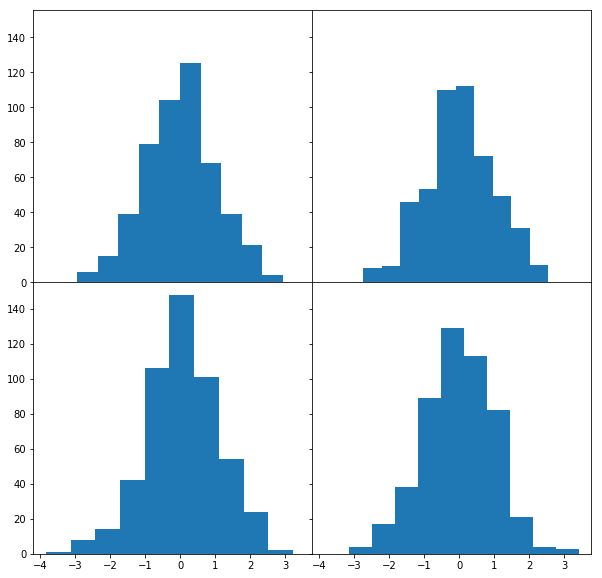

In [3]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500))
plt.subplots_adjust(wspace=0, hspace=0)

In [4]:
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s

0     0.495149
10    0.623217
20   -0.951731
30   -0.382564
40   -0.362325
50   -0.032652
60    0.224228
70   -0.605288
80   -1.697031
90   -3.939279
dtype: float64

In [5]:
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot()

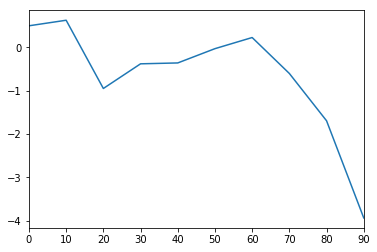

In [6]:
s.plot(ax=ax)

Run next line to create a data frame df

In [7]:
#
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.301007,-1.152841,-1.635185,-0.380078
10,0.850650,0.257704,-1.434076,1.553146
20,2.450119,-1.133972,-0.510004,1.227299
30,2.837261,-0.883724,0.194193,1.637224
40,4.637871,-0.030949,1.998756,0.039769
50,5.826052,-0.620537,2.045921,-1.245495
60,5.908234,-2.225037,2.887785,0.458761
70,4.763798,-3.240003,3.077316,1.080087
80,5.729801,-4.626095,2.186678,1.270416
90,5.574527,-4.702957,1.660718,0.514950


Plot a figure that:
1. Create line plot of A, B, C, D separately in 2 by 2 design
2. Same x and same y for each subplot
3. Entire figure size is 10 by 10
4. Show grid in each subplot

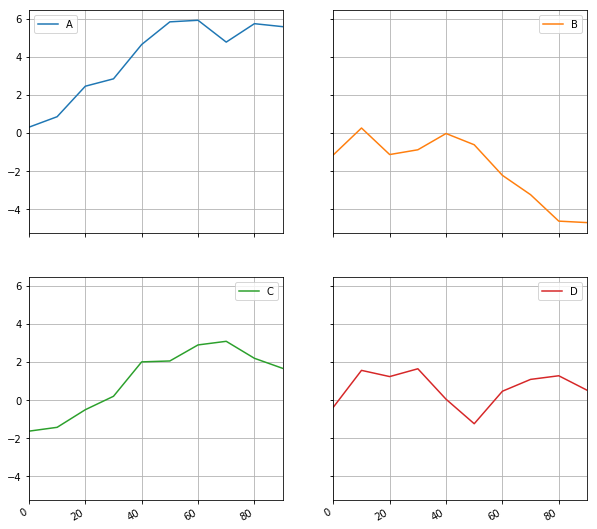

In [8]:
_ = df.plot(subplots=True, sharey=True, sharex=True, 
            figsize=(10, 10), grid=True, layout=(2, 2))

Run next cell to create df

In [9]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.888705,0.727566,0.222142,0.774338
two,0.725150,0.339237,0.591994,0.876852
three,0.919747,0.288232,0.249556,0.566070
four,0.210175,0.677374,0.831535,0.986485
five,0.921133,0.242871,0.596614,0.790346
six,0.314808,0.296421,0.939499,0.046424


Plot a figure that:
1. Show vertical bar plots of df in subplot 1
2. Show horizontal bar plots of A, B, C, D in subplot 2
3. The subplots have a 1 by 2 grid format
4. The figure size is 10 by 10

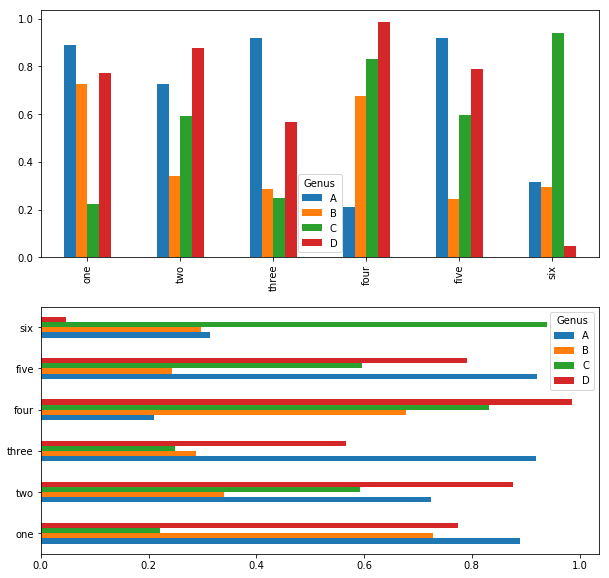

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
df.plot(kind='bar', ax=axes[0])
df.plot(kind='barh', ax=axes[1])

Repeat the last question but make the bar plots stacked

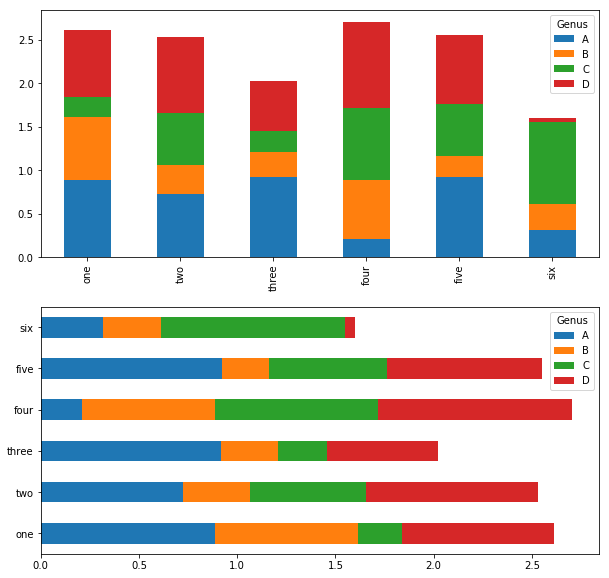

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
df.plot(kind='bar', stacked=True, ax=axes[0])
df.plot(kind='barh', stacked=True, ax=axes[1])

Creat a data frame by loading download/examples/tips.csv

In [12]:
tips = pd.read_csv('download/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Create frequency table where day is the rows and size is the columns

In [13]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [14]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


Create stacked vertical bar plots to display the normalized frequency of each size in each day. Each bar counts a day.

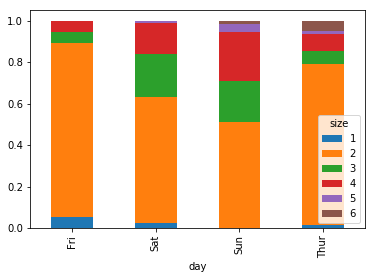

In [15]:
party_pcts.plot(kind='bar', stacked=True)

Plot a histogram of 50 bins showing the tip ratio distribution. Show grid in the figure.

In [16]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


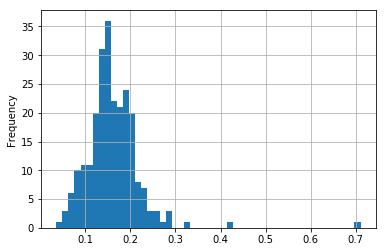

In [17]:
tips['tip_pct'].plot(kind='hist', bins=50, grid=True)

Pot a continuous PDF line to show the distribution of the tip ratio.

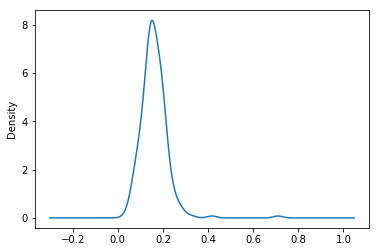

In [18]:
tips['tip_pct'].plot(kind='KDE')

Now plot the last plots in a single figure of size 10 by 10. Note that the histogram should be normalized.

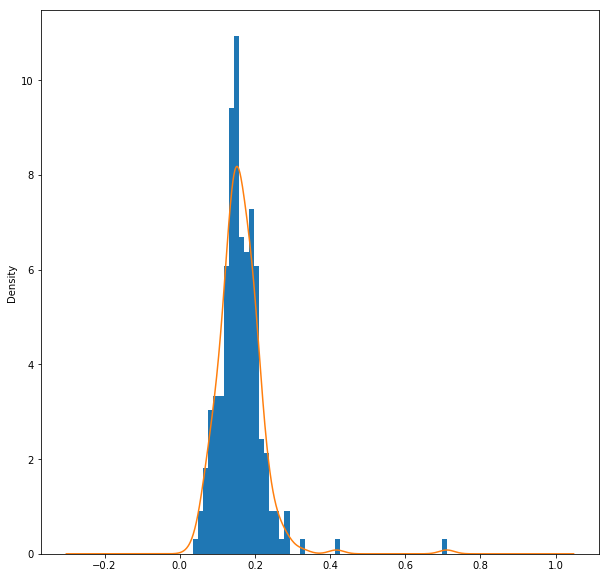

In [19]:
fig, axes = plt.subplots(1,1, figsize=(10, 10))
tips['tip_pct'].plot(kind='hist', bins=50, grid=True, ax=axes, normed=True)
tips['tip_pct'].plot(kind='KDE', ax=axes)

Create a dataframe of macro by loading macrodata.csv. Then create a dataframe from the columns of cpi, m1, tbilrate and unemp

In [20]:
macro = pd.read_csv('download/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


Create a new data frame 'trans_data' of the increment of data in rows in log scale. And drop the NaN

In [21]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Create scatter matrix from trans_data. Show the PDF of each column in the diagonal of the matrix

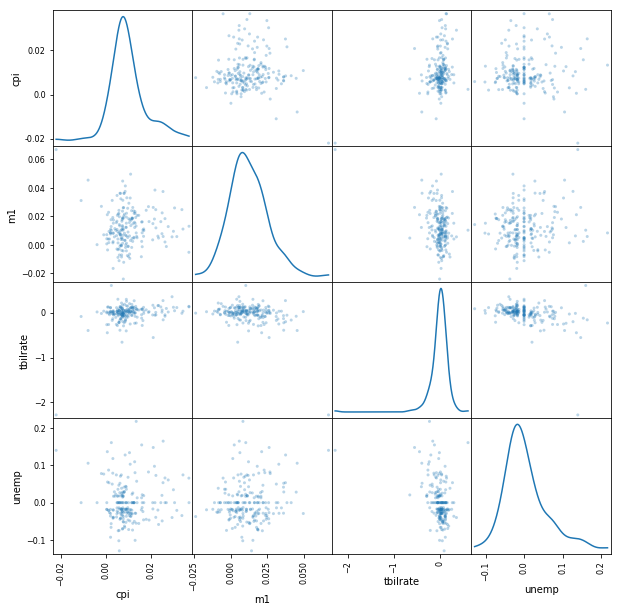

In [22]:
_ = pd.plotting.scatter_matrix(trans_data, figsize=(10, 10), diagonal='kde', alpha=0.3)

# Chapter 9: Data Aggregation and Group Operations

Create a data frame by next line

In [5]:
#
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-1.349942,0.383409,a,one
1,0.568861,2.500137,a,two
2,0.514784,-0.087320,b,one
3,-1.374696,-1.784974,b,two
4,-0.145957,-0.326931,a,one


Group data1 by key1, and compute the mean value of each group

In [6]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a   -0.309012
b   -0.429956
Name: data1, dtype: float64

Group data1 by key1 and key2, then compute the mean value of each gropu. Return the result as means

In [7]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.747949
      two     0.568861
b     one     0.514784
      two    -1.374696
Name: data1, dtype: float64

Group data1 by two arrays: ['Ohio', 'California', 'California', 'Ohio', 'Ohio'] and [2005, 2005, 2006, 2005, 2006]. And calculate the mean value of each group.

In [8]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years  = np.array([2005, 2005, 2006, 2005, 2006])

In [9]:
df['data1'].groupby([states, years]).mean()

California  2005    0.568861
            2006    0.514784
Ohio        2005   -1.362319
            2006   -0.145957
Name: data1, dtype: float64

In [10]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.309012,0.852205
b,-0.429956,-0.936147


Iteratively print the name and group content from df.groupby('key')

In [11]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -1.349942  0.383409    a  one
1  0.568861  2.500137    a  two
4 -0.145957 -0.326931    a  one
b
      data1     data2 key1 key2
2  0.514784 -0.087320    b  one
3 -1.374696 -1.784974    b  two


Iteratively print the name and group content of df.group(['key1', 'key2'])

In [12]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
      data1     data2 key1 key2
0 -1.349942  0.383409    a  one
4 -0.145957 -0.326931    a  one
a two
      data1     data2 key1 key2
1  0.568861  2.500137    a  two
b one
      data1    data2 key1 key2
2  0.514784 -0.08732    b  one
b two
      data1     data2 key1 key2
3 -1.374696 -1.784974    b  two


Convert the output of last qeustion to a dict in the format of ('a', 'one'): sub-dataframe

In [13]:
pieces = dict(list(df.groupby(['key1', 'key2'])))
pieces

{('a', 'one'):       data1     data2 key1 key2
 0 -1.349942  0.383409    a  one
 4 -0.145957 -0.326931    a  one, ('a', 'two'):       data1     data2 key1 key2
 1  0.568861  2.500137    a  two, ('b', 'one'):       data1    data2 key1 key2
 2  0.514784 -0.08732    b  one, ('b', 'two'):       data1     data2 key1 key2
 3 -1.374696 -1.784974    b  two}

Run the next cell to create a dataframe people

In [14]:
#
people = DataFrame(np.random.randn(5, 5), 
                  columns=['a', 'b', 'c', 'd', 'e'],
                  index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,1.812072,0.752672,0.544411,0.133439,-0.390863
Steve,-1.056842,1.212826,-0.574394,1.462618,-0.030889
Wes,0.495860,NaN,NaN,0.544028,0.877988
Jim,-1.660924,-1.136339,0.341660,-0.788356,-1.398764
Travis,0.820830,-1.089912,-0.550895,-1.055470,1.219454


Now group people by a dictionary "mapping" in axis 1. Then calculatet the sum in each group

In [15]:
#
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
          'd': 'blue', 'e': 'red', 'f': 'orange'}

In [16]:
by_column = people.groupby(mapping, axis=1)

In [17]:
by_column.sum()

,blue,red
Joe,0.677850,2.173881
Steve,0.888224,0.125095
Wes,0.544028,1.373848
Jim,-0.446696,-4.196027
Travis,-1.606365,0.950371


Use one-line code to group people by name length. Then print out the result

In [18]:
result = people.groupby(lambda x: len(x))
for (key, content) in result:
    print(key)
    print(content)
    print('==========================')

3
            a         b         c         d         e
Joe  1.812072  0.752672  0.544411  0.133439 -0.390863
Wes  0.495860       NaN       NaN  0.544028  0.877988
Jim -1.660924 -1.136339  0.341660 -0.788356 -1.398764
5
              a         b         c         d         e
Steve -1.056842  1.212826 -0.574394  1.462618 -0.030889
6
              a         b         c        d         e
Travis  0.82083 -1.089912 -0.550895 -1.05547  1.219454


Now group people by both the function above and a key_list. Then print out the result

In [19]:
#
key_list = ['one', 'one', 'one', 'two', 'two']

In [20]:
result = people.groupby([lambda x: len(x), key_list])
for key, content in result:
    print(key)
    print(content)
    print("===================")

(3, 'one')
            a         b         c         d         e
Joe  1.812072  0.752672  0.544411  0.133439 -0.390863
Wes  0.495860       NaN       NaN  0.544028  0.877988
(3, 'two')
            a         b        c         d         e
Jim -1.660924 -1.136339  0.34166 -0.788356 -1.398764
(5, 'one')
              a         b         c         d         e
Steve -1.056842  1.212826 -0.574394  1.462618 -0.030889
(6, 'two')
              a         b         c        d         e
Travis  0.82083 -1.089912 -0.550895 -1.05547  1.219454


Run next cell to create a multi-level dataframe hier_df

In [21]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                   names = ['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.306910 -0.589562  1.250412  1.014241  0.229434
1      0.581033  0.471640 -1.040997 -0.989691 -0.282648
2     -0.487274 -0.239181 -0.034611 -0.543970  2.028905
3      0.246848 -2.518413 -1.137184  1.114955  1.300006

Now group hier_df by the level of cty and print it out

In [22]:
result = hier_df.groupby(level='cty', axis=1)

In [23]:
for (key, content) in result:
    print(key)
    print(content)
    print("=========================")

JP
cty          JP          
tenor         1         3
0      1.014241  0.229434
1     -0.989691 -0.282648
2     -0.543970  2.028905
3      1.114955  1.300006
US
cty          US                    
tenor         1         3         5
0     -0.306910 -0.589562  1.250412
1      0.581033  0.471640 -1.040997
2     -0.487274 -0.239181 -0.034611
3      0.246848 -2.518413 -1.137184


Group df by key1, then compute the quantile of data1 at 0.9 for each group

In [31]:
grouped = df.groupby('key1')

In [32]:
grouped['data1'].quantile(0.9)

key1
a    0.425897
b    0.325836
Name: data1, dtype: float64

Define your own aggregation function to compute max-min for each group

In [35]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [36]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.918802,2.827069
b,1.889480,1.697654


Create a dataframe "tips" from tips.csv

In [43]:
tips = pd.read_csv('download/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Add a new column 'tip_pct', i.e., tip divided by total bill

In [45]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


Group tips by 'smoker' and return the result as 'grouped'

In [56]:
grouped = tips.groupby(['smoker'])

Define grouped_pct as the column of 'tip_pct' of grouped

In [57]:
grouped_pct = grouped['tip_pct']

Return a dataframe showing the mean, std, and max-min of grouped_pct for each group

In [61]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

,mean,std,peak_to_peak
smoker,,,
No,0.159328,0.039910,0.235193
Yes,0.163196,0.085119,0.674707


Repeat last question, but rename mean as 'foo', 'std' as 'bar', and max-min as 'range'

In [62]:
grouped_pct.agg([('foo', 'mean'), ('bar', 'std'), ('range', peak_to_peak)])

,foo,bar,range
smoker,,,
No,0.159328,0.039910,0.235193
Yes,0.163196,0.085119,0.674707


For each group in 'grouped', compute max of 'tip', and sum of 'size

In [67]:
grouped.agg({'tip': np.max, 'size': 'sum'})

,tip,size
smoker,,
No,9.0,403
Yes,10.0,224


For each group in 'grouped', compute min, max, mean, std of 'tip_pct', and compute sum of 'size'

In [72]:
grouped.agg({'tip_pct': ['min', 'max', 'mean'], 'size': np.sum})

tip_pct                     size
             min       max      mean  sum
smoker                                   
No      0.056797  0.291990  0.159328  403
Yes     0.035638  0.710345  0.163196  224

Group tips by 'smokder' and return an 'unindexed' form, then compute the mean value of each group

In [76]:
tips.groupby('smoker', as_index=False).mean()

,smoker,total_bill,tip,size,tip_pct
0,No,19.188278,2.991854,2.668874,0.159328
1,Yes,20.756344,3.008710,2.408602,0.163196


For the dataframe 'people', replace all its element by the group mean. The group mean is from people.groupby(key).mean()

In [81]:
#
key = ['one', 'two', 'one', 'two', 'one']

In [82]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,1.042921,-0.168620,-0.003242,-0.126001,0.568860
Steve,-1.358883,0.038244,-0.116367,0.337131,-0.714827
Wes,1.042921,-0.168620,-0.003242,-0.126001,0.568860
Jim,-1.358883,0.038244,-0.116367,0.337131,-0.714827
Travis,1.042921,-0.168620,-0.003242,-0.126001,0.568860


Subtract the group mean from each elemnt of people. Return the result as demeaned

In [86]:
def demean(arr):
    return arr - arr.mean()

In [87]:
demeaned = people.groupby(key).transform(demean)

In [88]:
demeaned

,a,b,c,d,e
Joe,0.769151,0.921292,0.547653,0.259440,-0.959722
Steve,0.302041,1.174583,-0.458027,1.125487,0.683937
Wes,-0.547060,NaN,NaN,0.670029,0.309128
Jim,-0.302041,-1.174583,0.458027,-1.125487,-0.683937
Travis,-0.222091,-0.921292,-0.547653,-0.929469,0.650594


Group tips by 'smoker', and return the top five values sorted by tip_pct for each group and each column. First you need to define a top function.

In [102]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [103]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

Now use the same top function to return the top 1 value sorted by 'total_bill'.

In [104]:
tips.groupby('smoker').apply(top, n=1, column='total_bill')

,,total_bill,tip,smoker,day,time,size,tip_pct
smoker,,,,,,,,
No,212,48.33,9.0,No,Sat,Dinner,4,0.186220
Yes,170,50.81,10.0,Yes,Sat,Dinner,3,0.196812


Run next cell to create a dataframe "frame"

In [121]:
frame = DataFrame({'data1': np.random.randn(1000), 
                  'data2': np.random.randn(1000)})
frame.head()

,data1,data2
0,-1.048195,-0.292306
1,-1.391864,-1.672489
2,0.105512,1.373573
3,0.335231,-0.210525
4,-0.577907,0.352007


Group frame.data2 by 4 bins of frame.data1 of equal width

In [124]:
factor = pd.cut(frame.data1, 4)

In [125]:
grouped = frame.data2.groupby(factor)

Calculate the count, max, mean, min of each group

In [126]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
           'count': group.count(), 'mean': group.mean()}

In [127]:
grouped.apply(get_stats)

data1                  
(-3.131, -1.364]  count     90.000000
                  max        2.384525
                  mean      -0.017717
                  min       -2.117153
(-1.364, 0.396]   count    574.000000
                  max        2.423879
                  mean       0.019780
                  min       -2.749166
(0.396, 2.156]    count    321.000000
                  max        3.548050
                  mean      -0.029649
                  min       -3.108420
(2.156, 3.916]    count     15.000000
                  max        2.599354
                  mean      -0.094110
                  min       -2.929676
Name: data2, dtype: float64

In [144]:
#
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.194887
New York      1.459614
Vermont            NaN
Florida       0.748366
Oregon        0.113388
Nevada             NaN
California    1.742560
Idaho              NaN
dtype: float64

We define the first 4 states as "East" group and the other 4 states as "West" group. Now fill in the missing value in data by the mean value of each group.

In [145]:
group_key = ['East']*4 + ['West']*4

In [146]:
fill_mean = lambda g: g.fillna(g.mean())

In [147]:
data.groupby(group_key).apply(fill_mean)

Ohio         -0.194887
New York      1.459614
Vermont       0.671031
Florida       0.748366
Oregon        0.113388
Nevada        0.927974
California    1.742560
Idaho         0.927974
dtype: float64

Similar to previous question, but fill in the missing value in 'East' group as 0.5, and 'Weat' group as -1.

In [149]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

In [152]:
data.groupby(group_key).apply(fill_func)

Ohio         -0.194887
New York      1.459614
Vermont       0.500000
Florida       0.748366
Oregon        0.113388
Nevada       -1.000000
California    1.742560
Idaho        -1.000000
dtype: float64

Run the next cell to create a dataframe "deck"

In [195]:
#
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10]*3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']

cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck.head(14)

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
dtype: int64

Randomly draw 5 cards from the deck

In [196]:
def draw(deck, n=5):
    # return deck.take(np.random.permutation(len(deck))[:n])
    return deck[np.random.permutation(len(deck))[:n]]

In [197]:
draw(deck)

3C     3
2S     2
2C     2
8S     8
KC    10
dtype: int64

Now randomly select two cards from each suit

In [198]:
get_suit = lambda card: card[-1]

In [199]:
deck.groupby(get_suit).apply(draw, n=2)

C  5C      5
   AC      1
D  9D      9
   JD     10
H  10H    10
   JH     10
S  5S      5
   7S      7
dtype: int64

Run next cell to create a dataframe 'df'

In [208]:
#
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,category,data,weights
0,a,1.102636,0.063144
1,a,-0.139783,0.605168
2,a,-0.025125,0.539846
3,a,0.549076,0.064918
4,b,-1.307463,0.988499
5,b,1.174933,0.200815
6,b,0.302792,0.257056
7,b,0.018509,0.983896


Group df by category, and compute the weighted average of data in each group.

In [201]:
grouped = df.groupby('category')

In [202]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [205]:
grouped.apply(get_wavg)

category
a   -0.528757
b   -0.318942
dtype: float64

Create a dataframe close_px from stock_px.csv

In [238]:
close_px = pd.read_csv('download/examples/stock_px.csv', parse_dates=True, index_col=0)
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


Create a dataframe rets as the daily percentage change of each column. Drop NaN values.

In [218]:
rets = close_px.pct_change().dropna()

Calculate the correlation of daily pencentage change for each stock with SPX. Show the result of each year.

In [239]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [240]:
by_year = rets.groupby(lambda x: x.year)

In [241]:
by_year.apply(spx_corr)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078
1995,0.291532,0.161829,0.519126,0.416390,0.315733,0.453660,0.413144,1.0,0.368752
1996,0.292344,0.191482,0.750724,0.388497,0.569232,0.564015,0.421477,1.0,0.538736
1997,0.564427,0.211435,0.827512,0.646823,0.703538,0.606171,0.509344,1.0,0.695653
1998,0.533802,0.379883,0.815243,0.623982,0.591988,0.698773,0.494213,1.0,0.369264
1999,0.099033,0.425584,0.710928,0.486167,0.517061,0.631315,0.336593,1.0,0.315383


Calculate the correlation between the daily percentage change of AAPL and MSFT. Show the result in each year.

In [242]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
2000    0.275298
2001    0.563156
2002    0.571095
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# Chapter 12: Advanced NumPy

Concatenate arr1 and arr2 in axis 1

In [3]:
#
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [4]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

Split arr to three parts along the axis 0

In [5]:
#
arr = randn(5, 2)

In [6]:
first, second, third = np.split(arr, [1, 3])
print(first)
print("===")
print(second)
print("===")
print(third)

[[-0.30491862  0.4494987 ]]
===
[[-0.68267633 -0.42900524]
 [ 0.2326878  -1.95193338]]
===
[[-1.12182634  0.39565943]
 [ 0.39196318  0.03123576]]


Convert array([0, 1, 2]) to array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [7]:
#
arr = np.arange(3)

In [8]:
np.repeat(arr, 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

Convert array([0, 1, 2]) to array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [9]:
np.repeat(arr, [2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

Create a new array of [a, a, a; a, a, a] from a

In [10]:
#
a = randn(2, 2)

In [11]:
np.tile(a, (2, 3))

array([[-0.73386335, -0.34468132, -0.73386335, -0.34468132, -0.73386335,
        -0.34468132],
       [ 0.72317477,  0.15788908,  0.72317477,  0.15788908,  0.72317477,
         0.15788908],
       [-0.73386335, -0.34468132, -0.73386335, -0.34468132, -0.73386335,
        -0.34468132],
       [ 0.72317477,  0.15788908,  0.72317477,  0.15788908,  0.72317477,
         0.15788908]])

Run next cell to create an array arr

In [17]:
#
arr = np.arange(10)*100
arr

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

Now, using one line code to replace arr[7] as 40, arr[1] as 41, arr[2] as 42, and arr[6] as 43

In [16]:
arr.put([7, 1, 2, 6], [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

Run next cell to create arr

In [18]:
arr = randn(1000, 50)

Randomize the rows of arr by two ways: fancy indexing and the take method. Compare the performance of these methods by %timeit

In [21]:
inds = np.random.permutation(np.shape(arr)[0])

In [23]:
%timeit arr[inds]

31.4 µs ± 502 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%timeit arr.take(inds)

2.56 µs ± 37.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


2D broadcasting: subtract column mean from each element in arr. Then prove that the the column mean of the result is zero.

In [28]:
#
arr = randn(4, 3)
arr

array([[-1.9412144 , -1.4215033 , -0.19955002],
       [-1.66923526,  0.14236103, -1.521721  ],
       [ 0.37477739,  0.72051275, -0.10979924],
       [-0.07799527, -0.60846403, -0.17933691]])

In [30]:
c_mean = arr.mean(axis=0)
c_mean

array([-0.82841689, -0.29177339, -0.50260179])

In [33]:
result = arr - c_mean
result.mean(axis=0)

array([  8.32667268e-17,   1.38777878e-17,   8.32667268e-17])

2D broadcasting: subtract row mean from each element in arr. Then prove that the the row mean of the result is zero.

In [35]:
r_mean = arr.mean(axis=1)
r_mean

array([-1.18742257, -1.01619841,  0.32849697, -0.28859874])

In [36]:
r_mean = r_mean[:, np.newaxis]
r_mean

array([[-1.18742257],
       [-1.01619841],
       [ 0.32849697],
       [-0.28859874]])

In [38]:
result = arr - r_mean
result.mean(axis=1)

array([  1.11022302e-16,   0.00000000e+00,  -5.55111512e-17,
        -9.25185854e-18])

3D broadcasting: subtract row mean from each element in arr (axis=1). Then prove that the the row mean of the result is zero.

In [52]:
#
arr = randn(3, 4, 5)

In [53]:
r_mean = arr.mean(axis=1)
r_mean

array([[ 0.92966618, -0.57230976, -0.0302751 , -0.42576723,  0.46298979],
       [-0.50423536,  0.25252306,  0.2399986 ,  0.02535741, -0.51781424],
       [ 0.00909152,  0.20680736,  0.73430901,  0.39701926,  0.72431892]])

In [54]:
r_mean = r_mean[:, np.newaxis, :]
r_mean.shape

(3, 1, 5)

In [55]:
result = arr-r_mean
result.mean(axis=1)

array([[  5.55111512e-17,  -5.55111512e-17,   0.00000000e+00,
         -2.77555756e-17,   0.00000000e+00],
       [  1.11022302e-16,   2.77555756e-17,  -1.38777878e-17,
          1.11022302e-16,  -2.77555756e-17],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.11022302e-16,   0.00000000e+00]])

In [58]:
arr = randn(3, 4)

In [59]:
arr

array([[ 1.41750227, -0.0022923 ,  0.19318345,  0.64805651],
       [ 0.0695369 ,  0.86009655,  1.05129153, -0.22359286],
       [ 1.94300615, -1.78766748, -0.38039405,  0.10077914]])

Set values by broadcasting: set each row of arr as arr2

In [64]:
#
arr = np.zeros((4, 3))
arr2 = np.array([1, 2, 3, 4])

In [65]:
arr[:] = arr2[:, np.newaxis]
arr

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.]])

Set values by broadcasting: set first row of arr as 10 the the second row as 11

In [66]:
arr[:2, :] = np.array([[10], [11]])
arr

array([[ 10.,  10.,  10.],
       [ 11.,  11.,  11.],
       [  3.,   3.,   3.],
       [  4.,   4.,   4.]])

Run next cell to define a function.

In [88]:
# 
def add_elements(x, y):
    return x + y

Define a new function which apply add_elements on two arrays element-wisely.

In [89]:
add_them = np.frompyfunc(add_elements, 2, 1)

In [90]:
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

Repeat last question and make sure the output of the new function has a data type of np.float64

In [95]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.])

Run next cell to define arr. Then compare the time cost of user-defined ufunc add_them(arr, arr) and the built-in numpy function np.add(arr, arr)

In [102]:
#
arr = randn(10000)

In [98]:
%timeit add_them(arr, arr)

1.28 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [99]:
%timeit np.add(arr, arr)

2.83 µs ± 23.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Run next cell to creat arr

In [3]:
#
arr = randn(3, 5)

Sort the first row of arr in-place

In [4]:
arr[:, 0].sort()

In [5]:
arr

array([[-1.18944714, -0.57580835,  0.01439142, -0.71813535,  1.02361581],
       [-0.95328593,  1.06212103, -0.61151059,  0.0783153 , -0.51453327],
       [ 0.77317574,  0.42511843, -1.24434035, -1.1191067 , -1.17325185]])

Sort arr at each row, in-place

In [8]:
arr.sort(axis=1)
arr

array([[-1.18944714, -0.71813535, -0.57580835,  0.01439142,  1.02361581],
       [-0.95328593, -0.61151059, -0.51453327,  0.0783153 ,  1.06212103],
       [-1.24434035, -1.17325185, -1.1191067 ,  0.42511843,  0.77317574]])

Create arr again, then sort each column of in descending order

In [9]:
arr = randn(3, 5)
arr.sort()
arr = arr[:, ::-1]
arr

array([[ 0.65038706,  0.41664733, -0.29477582, -0.74361846, -1.02849575],
       [ 0.64089438, -0.57237116, -1.19245184, -1.37775448, -1.65686276],
       [ 1.685177  ,  0.83095529,  0.47800578,  0.36217236, -0.90771235]])

Run next cell to create "name"

In [45]:
#
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
name = np.array([last_name, first_name])
name

array([['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'],
       ['Bob', 'Jane', 'Steve', 'Bill', 'Barbara']],
      dtype='<U7')

Sort name. Use last name as the primary key and first name as the secondary key.

In [46]:
sorter = np.lexsort((name[1], name[0]))

In [47]:
name[:, sorter]

array([['Arnold', 'Arnold', 'Jones', 'Jones', 'Walters'],
       ['Jane', 'Steve', 'Bill', 'Bob', 'Barbara']],
      dtype='<U7')

Run next cell to create a sorted array "arr"

In [54]:
arr = np.sort(np.array([0, 1, 7, 12, 15]))
arr

array([ 0,  1,  7, 12, 15])

Now insert [0, 8, 11, 16] into arr and keep the ascending order

In [71]:
value = np.array([0, 8, 11, 16])
pos = arr.searchsorted(value)

In [72]:
np.insert(arr, pos, value)

array([ 0,  0,  1,  7,  8, 11, 11, 15, 16])

Run next cell to creata 2D array X

In [79]:
#
X = randn(4, 3)

Convert X to matrix, and then compute matrix multiplication Y * X where Y is the transpose of the last column of X

In [93]:
X = np.matrix(X)

In [94]:
Y = X[:, -1]
Y = Y.T

In [96]:
Y*X

matrix([[-1.50521962,  2.11454267,  8.81702051]])